In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [2]:
us_states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [3]:
power_plants = pd.read_csv("powerplants.csv")
power_plants.head()
points = power_plants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

power_plants = gpd.GeoDataFrame(power_plants, geometry = points)
power_plants.crs= {'init': 'epsg:4326'}
power_plants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344)


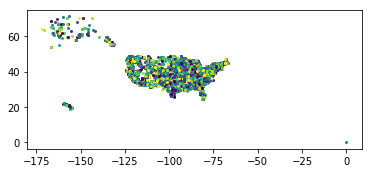

In [4]:
power_plants.plot()

In [5]:
us_states_conv = us_states.to_crs(power_plants.crs)
us_states_conv.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


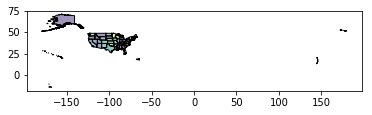

In [6]:
us_states_conv.plot()

In [7]:
from shapely.geometry import Polygon

bounds =   [[
              -138.515625,
              22.59372606392931
            ],
            [
              -56.25,
              22.59372606392931
            ],
            [
              -56.25,
              50.84757295365389
            ],
            [
              -138.515625,
              50.84757295365389
            ],
            [
              -138.515625,
              22.59372606392931
            ]]
            
continental_poly = Polygon(bounds)

us_states_conv[us_states_conv.to_crs({'init': 'epsg:4326'}).within(continental_poly)].head(10)
continental = us_states_conv[us_states_conv.to_crs({'init': 'epsg:4326'}).within(continental_poly)]

In [8]:
continental.head()


,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."


(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

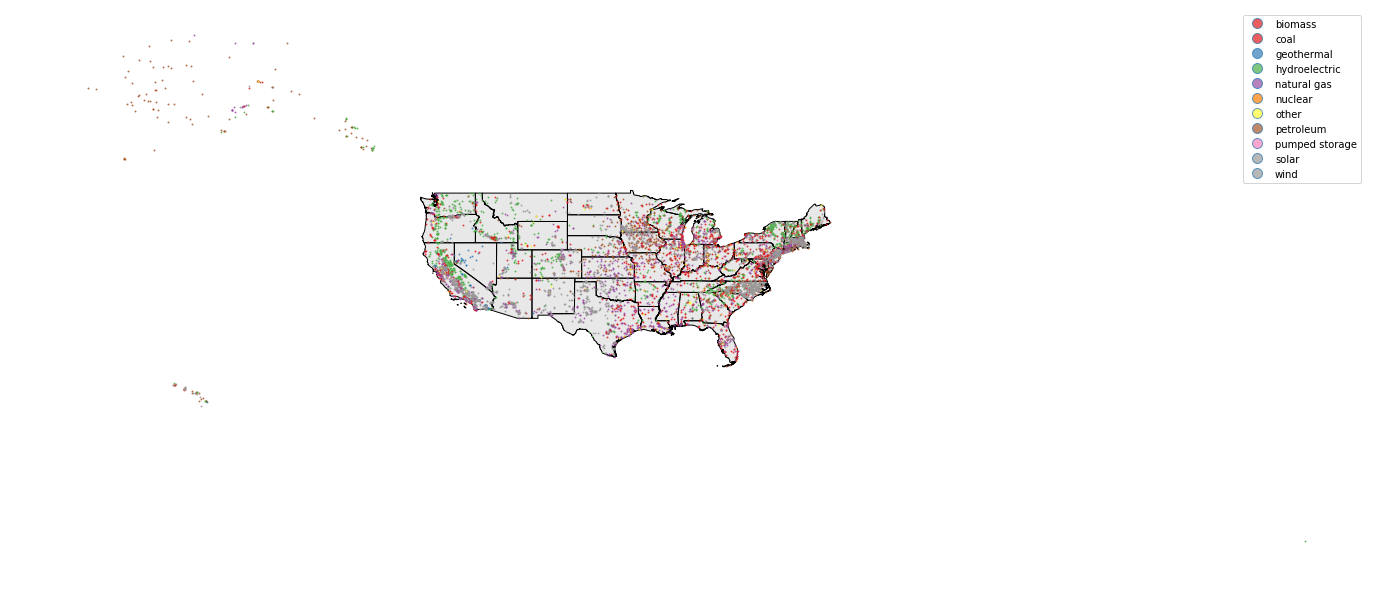

In [9]:
ax = continental.plot(figsize=(24,24), color='lightgray')
power_plants.plot(markersize=1, alpha=0.7, ax=ax, column='PrimSource', legend=True)
ax.axis('off')

In [10]:
power_plants.dtypes

Plant_Code      int64
Plant_Name     object
Utility_Na     object
Utility_ID      int64
sector_nam     object
City           object
County         object
Zip             int64
Street_Add     object
PrimSource     object
Total_MW      float64
Coal_MW       float64
NG_MW         float64
Crude_MW      float64
Bio_MW        float64
Hydro_MW      float64
HydroPS_MW    float64
Nuclear_MW    float64
Solar_MW      float64
Wind_MW       float64
Geo_MW        float64
Other_MW      float64
source_des     object
tech_desc      object
Source         object
Period          int64
Latitude      float64
Longitude     float64
geometry       object
dtype: object

In [12]:
air_quality = pd.read_csv("pm25_annual_fixed.csv")
points = air_quality.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

air_quality = gpd.GeoDataFrame(air_quality, geometry = points)
air_quality.crs= {'init': 'epsg:4326'}
air_quality.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)


In [13]:
us_states_conv_air = us_states_conv.to_crs(air_quality.crs)



In [14]:
us_states_conv_air.crs

{'init': 'epsg:4326'}

In [15]:
air_quality.crs

{'init': 'epsg:4326'}

(-163.98705724999999,
 -62.329077749999996,
 17.922097100000002,
 50.882560900000001)

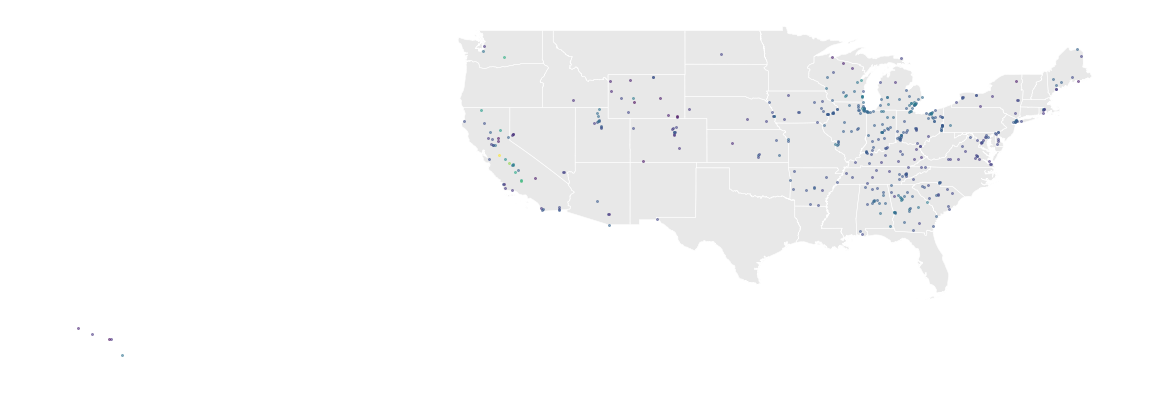

In [18]:
ax = continental.plot(color = "lightgrey", linewidth = 0.5, edgecolor = "white", figsize = (20,7))
air_quality.plot(figsize = (20,7), alpha = 0.5, column='Arithmetic Mean', ax = ax)
ax.axis("off")

(-163.98705724999999,
 -62.329077749999996,
 17.922097100000002,
 50.882560900000001)

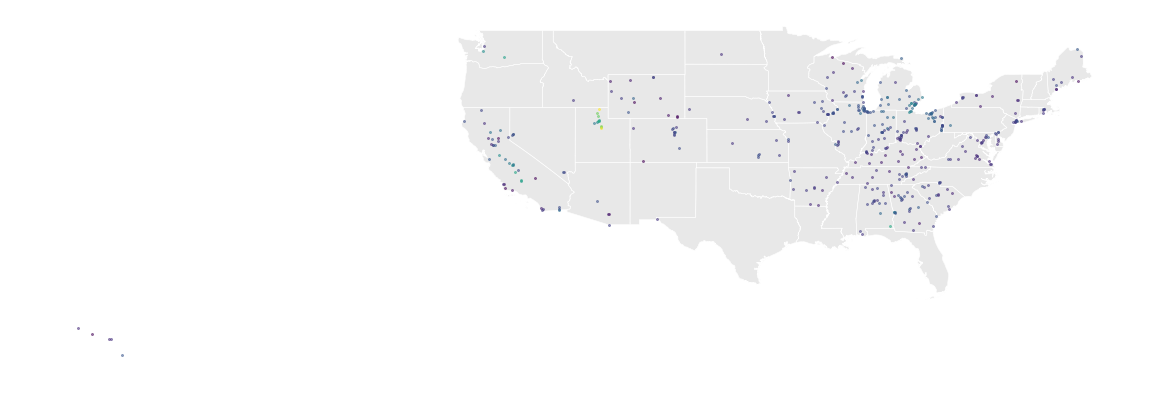

In [19]:
ax = continental.plot(color = "lightgrey", linewidth = 0.5, edgecolor = "white", figsize = (20,7))
air_quality.plot(figsize = (20,7), alpha = 0.5, column='1st Max Value', ax = ax)
ax.axis("off")

In [38]:
power_plants["Utility_Na"].value_counts().head(5)


Pacific Gas & Electric Co        82
Erie Boulevard Hydropower LP     71
Sustainable Power Group, LLC     63
Southern California Edison Co    62
PacifiCorp                       59
Name: Utility_Na, dtype: int64

In [41]:
power_plants_top5 = power_plants[power_plants["Utility_Na"].isin(["Pacific Gas & Electric Co", "Erie Boulevard Hydropower LP", "Sustainable Power Group, LLC", "Southern California Edison Co", "PacifiCorp"])]

power_plants_top5.head()



,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,Top 5 companies
58,104,J S Eastwood,Southern California Edison Co,17609,Electric Utility,Shaver Lake,Fresno,93664,Hwy 168 Sierra National Forest,pumped storage,...,NaN,NaN,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,"EIA-860, EIA-860M and EIA-923",201607,37.147926,-119.256700,POINT (-119.2567 37.147926),NaN
93,180,Volta 2,Pacific Gas & Electric Co,14328,Electric Utility,Manton,Shasta,96059,Manton-Viola Road,hydroelectric,...,NaN,NaN,Hydroelectric = 0.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,40.451930,-121.862150,POINT (-121.86215 40.45193),NaN
109,214,Alta Powerhouse,Pacific Gas & Electric Co,14328,Electric Utility,Alta,Placer,95701,NaN,hydroelectric,...,NaN,NaN,Hydroelectric = 1 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,39.215979,-120.803550,POINT (-120.80355 39.215979),NaN
111,217,Balch 1,Pacific Gas & Electric Co,14328,Electric Utility,Balch Camp,Fresno,93649,Trimmer Springs Road,hydroelectric,...,NaN,NaN,Hydroelectric = 34 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,36.909137,-119.087712,POINT (-119.087712 36.909137),NaN
112,218,Balch 2,Pacific Gas & Electric Co,14328,Electric Utility,Balch Camp,Fresno,93649,Trimmer Springs Road,hydroelectric,...,NaN,NaN,Hydroelectric = 105 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,36.908907,-119.087556,POINT (-119.087556 36.908907),NaN


In [43]:
power_plants_not_top5 = power_plants[~power_plants["Utility_Na"].isin(["Pacific Gas & Electric Co", "Erie Boulevard Hydropower LP", "Sustainable Power Group, LLC", "Southern California Edison Co", "PacifiCorp"])]
power_plants_not_top5.head()


,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,Top 5 companies
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),NaN
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),NaN
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),NaN
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128),NaN
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344),NaN


In [46]:
power_plants_top5.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,Top 5 companies
58,104,J S Eastwood,Southern California Edison Co,17609,Electric Utility,Shaver Lake,Fresno,93664,Hwy 168 Sierra National Forest,pumped storage,...,NaN,NaN,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,"EIA-860, EIA-860M and EIA-923",201607,37.147926,-119.256700,POINT (-119.2567 37.147926),NaN
93,180,Volta 2,Pacific Gas & Electric Co,14328,Electric Utility,Manton,Shasta,96059,Manton-Viola Road,hydroelectric,...,NaN,NaN,Hydroelectric = 0.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,40.451930,-121.862150,POINT (-121.86215 40.45193),NaN
109,214,Alta Powerhouse,Pacific Gas & Electric Co,14328,Electric Utility,Alta,Placer,95701,NaN,hydroelectric,...,NaN,NaN,Hydroelectric = 1 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,39.215979,-120.803550,POINT (-120.80355 39.215979),NaN
111,217,Balch 1,Pacific Gas & Electric Co,14328,Electric Utility,Balch Camp,Fresno,93649,Trimmer Springs Road,hydroelectric,...,NaN,NaN,Hydroelectric = 34 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,36.909137,-119.087712,POINT (-119.087712 36.909137),NaN
112,218,Balch 2,Pacific Gas & Electric Co,14328,Electric Utility,Balch Camp,Fresno,93649,Trimmer Springs Road,hydroelectric,...,NaN,NaN,Hydroelectric = 105 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,36.908907,-119.087556,POINT (-119.087556 36.908907),NaN


In [48]:
power_plants_not_top5.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,Top 5 companies
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),NaN
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),NaN
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),NaN
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128),NaN
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344),NaN


(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

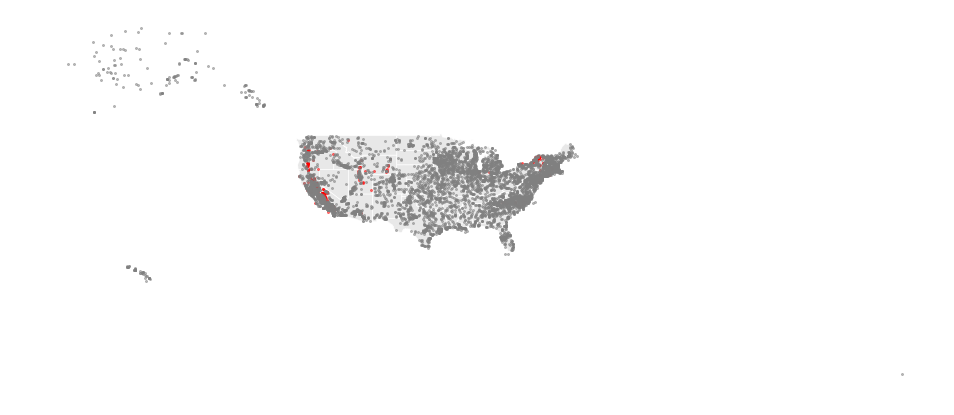

In [50]:
ax = continental.plot(color = "lightgrey", linewidth = 0.5, edgecolor = "white", figsize = (20,7))
power_plants_top5.plot(figsize = (20,7), alpha = 0.5, ax = ax, color = "red")
power_plants_not_top5.plot(figsize = (20,7), alpha = 0.5, ax = ax, color = "grey")
ax.axis("off")





In [60]:
import re
power_plants_nuclear = power_plants[power_plants["PrimSource"].str.contains("nuclear")]
power_plants_nuclear.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,Top 5 companies
22,46,Browns Ferry,Tennessee Valley Authority,18642,Electric Utility,Decatur,Limestone,35609,Shaw Rd. PO Box 2000,nuclear,...,NaN,NaN,Nuclear = 3309.4 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,34.70420,-87.11890,POINT (-87.1189 34.7042),NaN
106,204,Clinton Power Station,Exelon Nuclear,55951,IPP Non-CHP,Clinton,DeWitt,61727,Rt. 54 West,nuclear,...,NaN,NaN,Nuclear = 1065 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,40.17190,-88.83390,POINT (-88.8339 40.1719),NaN
108,210,Wolf Creek Generating Station,Wolf Creek Nuclear Optg Corp,20893,Electric Utility,Burlington,Coffey,66839,1550 Oxen Lane N.E.,nuclear,...,NaN,NaN,Nuclear = 1175 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,38.23926,-95.68978,POINT (-95.68978 38.23925999999999),NaN
220,371,Columbia Generating Station,Energy Northwest,20160,Electric Utility,Richland,Benton,99352,PO Box 968,nuclear,...,NaN,NaN,Nuclear = 1158 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,46.47110,-119.33390,POINT (-119.3339 46.4711),NaN
361,566,Millstone,Dominion Nuclear Conn Inc,5221,IPP Non-CHP,Waterford,New London,6385,Route 156 Rope Ferry Road,nuclear,...,NaN,NaN,Nuclear = 2087.8 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,41.31070,-72.16770,POINT (-72.1677 41.3107),NaN


In [61]:
power_plants_not_nuclear = power_plants[~power_plants["PrimSource"].str.contains("nuclear")]
power_plants_not_nuclear.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,Top 5 companies
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),NaN
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),NaN
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),NaN
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128),NaN
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344),NaN


(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

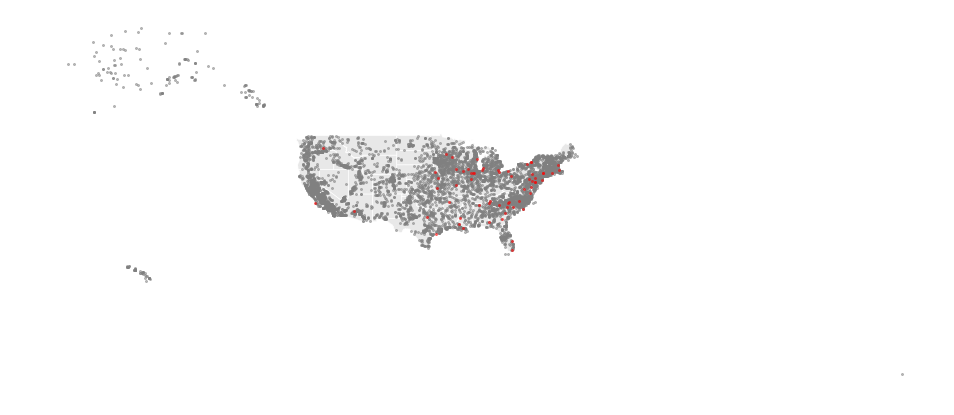

In [63]:
ax = continental.plot(color = "lightgrey", linewidth = 0.5, edgecolor = "white", figsize = (20,7))
power_plants_not_nuclear.plot(figsize = (20,7), alpha = 0.5, ax = ax, color = "grey")
power_plants_nuclear.plot(figsize = (20,7), alpha = 0.5, ax = ax, color = "red")
ax.axis("off")



In [69]:
power_plants_gas_oil = power_plants[power_plants["PrimSource"].str.contains("gas") | power_plants["PrimSource"].str.contains("petroleum")]
power_plants_gas_oil.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,Top 5 companies
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.0128,-85.9708,POINT (-85.9708 34.0128),NaN
5,9,Copper,El Paso Electric Co,5701,Electric Utility,El Paso,El Paso,79915,651 Hawkins Blvd.,natural gas,...,NaN,NaN,Natural Gas = 62 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,31.7569,-106.3750,POINT (-106.375 31.7569),NaN
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,...,NaN,NaN,"Coal = 497 MW, Natural Gas = 740 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,32.6017,-87.7811,POINT (-87.7811 32.6017),NaN
19,30,Madelia,City of Madelia - (MN),29305,Electric Utility,City of Madelia,WATONWAN,56062,24 Abbot Ave. S.W.,natural gas,...,NaN,NaN,Natural Gas = 10.3 MW,Natural Gas Internal Combustion Engine,"EIA-860, EIA-860M and EIA-923",201607,44.0501,-94.4178,POINT (-94.4178 44.0501),NaN
28,54,J K Smith,"East Kentucky Power Coop, Inc",5580,Electric Utility,Winchester,Clark,40391,12145 Irvine Road,natural gas,...,NaN,NaN,Natural Gas = 784 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,37.8833,-84.1017,POINT (-84.10169999999999 37.8833),NaN


(-176.9505662, -61.711767799999997, 17.048579999999998, 73.875020000000006)

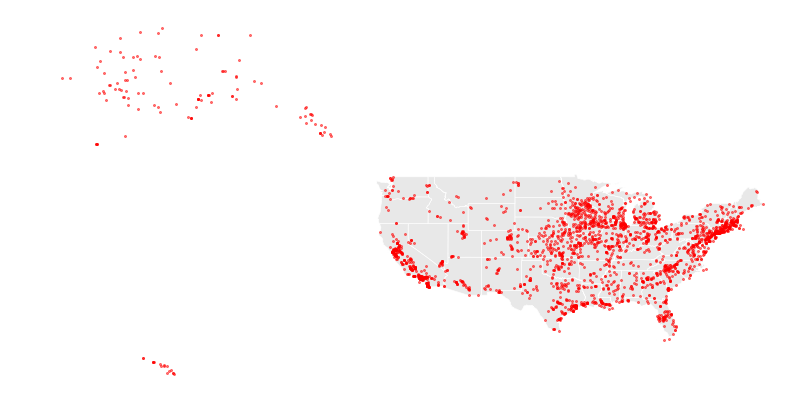

In [70]:
ax = continental.plot(color = "lightgrey", linewidth = 0.5, edgecolor = "white", figsize = (20,7))
power_plants_gas_oil.plot(figsize = (20,7), alpha = 0.5, ax = ax, color = "red")
ax.axis("off")

